initial shape nodes...
(1490, 3)


<IPython.core.display.Javascript object>


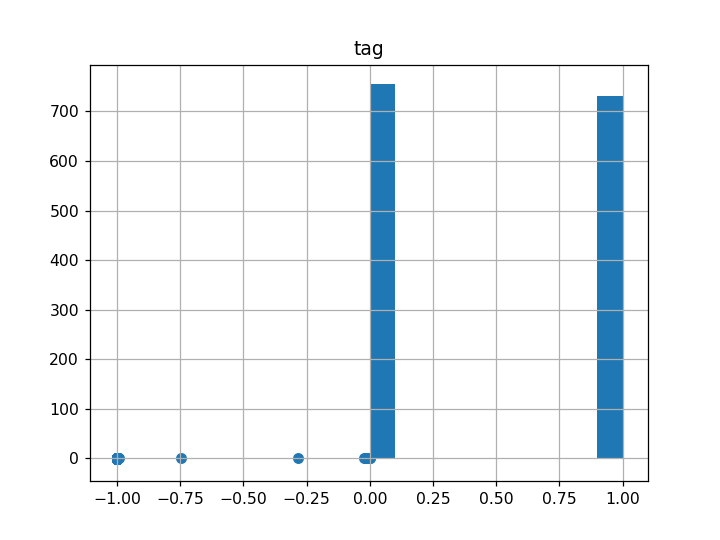

---initial shape edges
(19090, 2)
---shape edges after removing duplicates
(19022, 2)
final sizes
(1490, 3)
(19022, 2)


In [1]:
import pandas as pd
import os
import numpy as np
from os.path import abspath, exists
from scipy import sparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib notebook

nodes = pd.read_table('nodes.txt', header= None)
nodes.columns = ['id','nodeInfo','tag','temp']
#removing unneeded info
nodes.drop(['temp'], axis=1, inplace=True)
print('initial shape nodes...')
print(nodes.shape)
nodes.hist(column = 'tag')

#removing edges with same source and target
edges = pd.read_table('edges.txt' ,header = None)
edges.columns = ['source','target']
print('---initial shape edges')
print(edges.shape)
indexes = edges[edges['source'] == edges['target']].index
edges = edges.drop(indexes)
edges.drop_duplicates(keep = 'first', inplace = True) 
print('---shape edges after removing duplicates')
print(edges.shape)

#removing isolated nodes
#df1 = pd.merge(nodes, edges, left_on = 'id', right_on = 'source', how = 'inner')
#df2 = pd.merge(nodes, edges, left_on = 'id', right_on = 'target', how = 'inner')
#df3 = pd.concat([df1,df2])
#nodes_with_edges = np.sort(df3.id.unique()).tolist()
#nodes = nodes[nodes['id'].isin(nodes_with_edges)]


print('final sizes')
print(nodes.shape)
print(edges.shape)


In [2]:
    
    # spectral clustering
    #n = edges.shape[0]
    k = 2
    a = edges.to_numpy()
    
    i = a[:, 0]
    j = a[:, 1]
    
    print(i[1:5])
    print(j[1:5])
    print(i.shape)
    n= nodes.shape[0]+1
    print(n)
    
    v = np.ones((a.shape[0], 1)).flatten()
    print('shape v')
    print(v.shape)
    
    #A = sparse.coo_matrix((n, n), 0)
    #print(A)
    A = sparse.coo_matrix((v, (i, j)),shape=(n,n)) 
    print(A.shape)
    
    A = (A + np.transpose(A))/2
    print(A.get_shape())

    A = A[A.getnnz(1)>0][:,A.getnnz(0)>0]
    D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
    L = D @ A @ D
    
    
    v, x = np.linalg.eig(L)
    x = x[:, 0:k].real
    x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

    # scatter
    plt.scatter(x[:, 0], x[:, 1])
    plt.show()

    # k-means
    kmeans = KMeans(n_clusters=k).fit(x)
    c_idx = kmeans.labels_
    
    # show cluster
    idx2name = nodes['nodeInfo']
    idx2tag = nodes['tag']
    for i in range(k):
        print(f'Cluster {i+1}\n***************')
        idx = [index for index, t in enumerate(c_idx) if t == i]
        counter = 0
        for index in idx: 
            print(idx2name[index])
            if pd.notnull(idx2tag[index]):
                counter += int(idx2tag[index])
        print('total blogs related with political orientation (= 1): ')
        print(counter)
        print('out of total blogs in one cluster: ')
        print(len(idx))
        print('\n')
    
    

[267 267 904 904]
[ 483 1051 1479  919]
(19022,)
1491
shape v
(19022,)
(1491, 1491)
(1491, 1491)
Cluster 1
***************
100monkeystyping.com
12thharmonic.com/wordpress
40ozblog.blogspot.com
4lina.tblog.com
750volts.blogspot.com
95theses.blogspot.com
abbadabbaduo.blogspot.com
aboutpolitics.blogspot.com
achingandspinning.blogspot.com
ackackack.com
adamtalib.blogspot.com
adviceforlefty.blogspot.com
agonist.org
aintnobaddude.com
ajbenjaminjr.blogspot.com
alicublog.blogspot.com
allanjenkins.typepad.com
allspinzone.blogspot.com
alphapredator.com/wdtgw.htm
alternateworlds.blogspot.com
althippo.blogspot.com
alvintostig.typepad.com
americablog.blogspot.com
americablog.org
americandreamslost.blogspot.com
americanmuslim.blogs.com
americanpolitics.com
americansforbayh.blogspot.com
amleft.blogspot.com
amliberal.com/blog
amptoons.com/blog
anarchyxero.robfindlay.org
andifeelfine.blogspot.com
andymatic.com
angrybear.blogspot.com
angrydesi.typepad.com
angryfinger.org
angryhomo.blogspot.com
annatopia

peacegarden.blogspot.com
penheaded.blogspot.com
pennywit.com/drupal
permanentred.com
peskytherat.com/pesky
phillybri.blogspot.com
philoponia.blogspot.com
philosophers-stone.blogspot.com
philvbblog.blogspot.com
phoblographer.com
pinkofeministhellcat.typepad.com/pinko_feminist_hellcat
planetdave.com/blogs.php3?mid=1
politicalinsanity.com
politicalmonitor.us/blog
politicalstrategy.org
politicalthought.net
politicalwire.com
politics.feedster.com
politicswithrichard.blogspot.com
polizeros.com
pollsterseek.blogspot.com
popstalin.com/news
portapulpit.com
posptect.org/weblog
praguewriter.typepad.com
presidentboxer.blogspot.com
prestoncaldwellblog.blogspot.com
probitus.obrien4.net
profgoose.blogspot.com
progressivecyclone.blogspot.com
progressivedialogue.com
progressiveink.com
progressiveink.com/bloggers.php
progressivesociety.com/blog
progressivetrail.org/blog.shtml
proponentofreason.blogspot.com
prospect.org/weblog
pudentilla.blogspot.com
punditician.blogspot.com
purplestates.blogspot.com
qan

bobhayes.net
boottotheskull.com
borgardblog.blogspot.com
brainshavings.com
brendonsspiderhole.blogspot.com
brianlarry.com
brianscott.blogspot.com
brutallyhonest.org
buckeyepundit.blogspot.com
bullmooserepublicans.com/blog
bushblog.us
c-pol.blogspot.com
californiaconservatives4truth.blogspot.com
calirep.blogspot.com
calpoly.edu/~doleary/blog.htm
campaignofone.org/blog/index.asp
captainsquartersblog.com/mt
catscape.com
cayankee.blogs.com
cbcbcbcb.blogspot.com
ccs178.com
cdharris.net
cecile.squarespace.com
celluloid-wisdom.com/pw
celluloid-wisdom.com/pw/
centinel.blogspot.com
chadster.capitalfocus.org
chainik_hocker.blogspot.com
charlesking.blogspot.com
chiefsblog.blogspot.com
chrenkoff.blogspot.com
christian-patriot.blogspot.com
civilcommotion.com
claycalhoun.com
claytoncorner.blogspot.com
clubforgrowth.org/blog
cmillertime.blogspot.com
coffee.ondragonswing.com
commonsenserunswild.typepad.com
confederateyankee.blogspot.com
conpro.blogspot.com
conservativeblogger.com
conservativecat.com
c